<a href="https://colab.research.google.com/github/marawayne/git-test/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


#Imports

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import models, callbacks
from tensorflow.keras import layers
from keras.datasets import mnist, imdb
import matplotlib.pyplot as plt

import os

print(('Your TensorFlow version: {0}').format(tf.__version__))
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Your TensorFlow version: 2.1.0-rc1
Eager mode:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Using TensorFlow backend.


GPU is available



#Loading Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


#Check Data

In [4]:
train_images.shape

(60000, 28, 28)

#Data Preprocessing

In [0]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255

#Defining the Model

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))

#Train the Model

In [0]:
model.compile(optimizer='rmsprop',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [0]:
model_checkpoint = callbacks.ModelCheckpoint("my_checkpoint.h5", save_best_only=True)
early_stopping = callbacks.EarlyStopping(patience=50)

In [0]:
history = model.fit(train_images, train_labels, epochs=60, batch_size=128, verbose=0, validation_data=(test_images, test_labels), callbacks=[early_stopping, model_checkpoint])

In [10]:
results = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.2336 - accuracy: 0.9824


In [0]:
history.history.keys() #dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

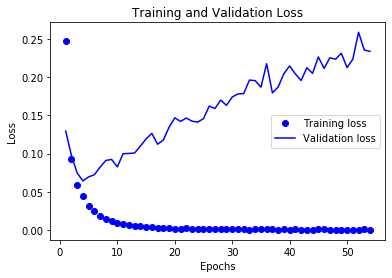

In [12]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


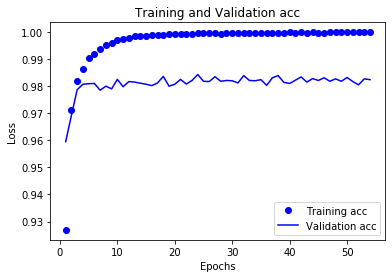

In [13]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()